In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from model import UNet
    


2547.0


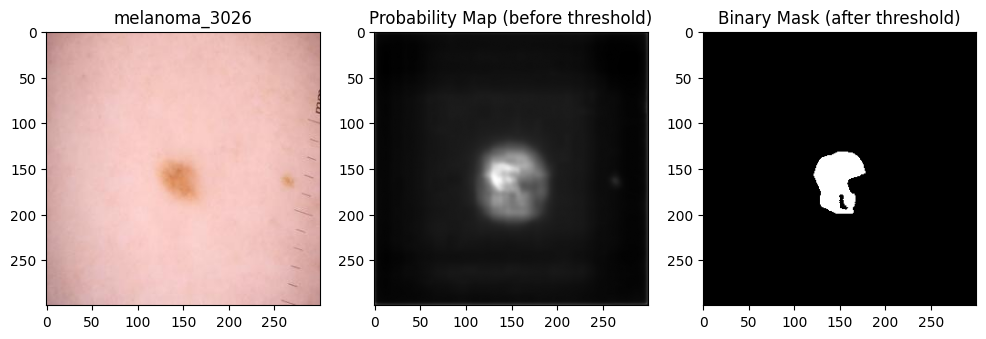

In [9]:
import torch
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import random
from pathlib import Path

# 1. Load model
model = UNet(n_channels=3, n_classes=1, bilinear=False)
model.load_state_dict(torch.load('C:/Users/Fourth/models/unet_dice0.8369_save1746204838.pt', map_location='cpu'))  # adjust path
model.eval()

# 2. Define transforms
transform = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
])

# Setup path to data folder (WindowsPath objects)
data_path = Path("C:/Users/Fourth/data/")
image_path = data_path / "melanoma_cancer_dataset/"

# Set seed
random.seed() # <- try changing this and see what happens

#Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg")) # array containing image paths

# 3. Load a test image
img_path = random.choice(image_path_list)
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)  # add batch dimension

# 4. Inference
with torch.no_grad():
    output = model(input_tensor)  # Already sigmoid inside model
    pred_mask = (output > 0.02).float()

print(pred_mask.sum().item())
# 5. Visualize (without thresholding first)
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title(f'{img_path.stem}')
plt.imshow(img)

plt.subplot(1,3,2)
plt.title('Probability Map (before threshold)')
plt.imshow(output.squeeze(0).squeeze(0).numpy(), cmap='gray')  # <- visualize sigmoid output directly

plt.subplot(1,3,3)
plt.title('Binary Mask (after threshold)')
plt.imshow(pred_mask.squeeze(0).squeeze(0).numpy(), cmap='gray')

plt.show()



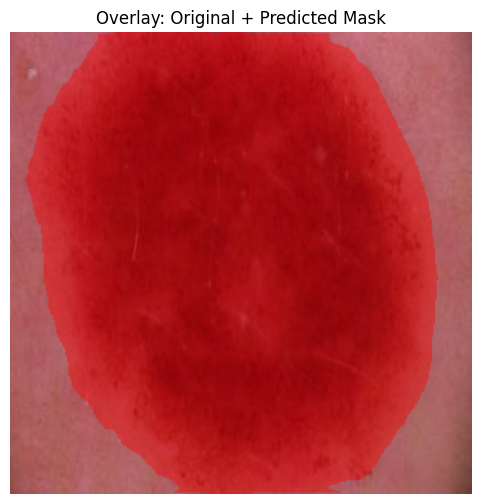

In [6]:
import numpy as np

# Convert original image and mask to NumPy
orig_img_np = np.array(img.resize((300, 300)))  # Make sure dimensions match
mask_np = pred_mask.squeeze().numpy()

# Normalize mask to 0-255 for alpha channel
mask_overlay = (mask_np * 255).astype(np.uint8)

# Create a red overlay mask
red_overlay = np.zeros_like(orig_img_np)
red_overlay[..., 0] = 255  # Red channel only

# Blend: show red where the mask is 1, original where mask is 0
alpha = 0.4  # Transparency
blended = np.where(mask_np[..., None] == 1,
                   (orig_img_np * (1 - alpha) + red_overlay * alpha).astype(np.uint8),
                   orig_img_np)

# Show overlay
plt.figure(figsize=(6, 6))
plt.title("Overlay: Original + Predicted Mask")
plt.imshow(blended)
plt.axis("off")
plt.show()


0.0


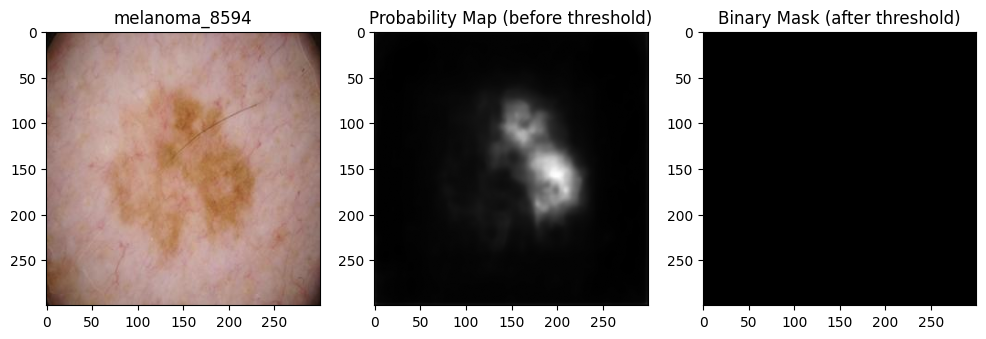

In [8]:

transform = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
])
# Setup path to data folder (WindowsPath objects)
test_path = Path("C:/Users/Fourth/")
image_path = test_path / "test images/"

#Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*.jpg")) # array containing image paths

# 3. Load a test image
img_path = random.choice(image_path_list)
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)  # add batch dimension

# 4. Inference
with torch.no_grad():
    output = model(input_tensor)  # Already sigmoid inside model
    pred_mask = (output > 0.2).float()

print(pred_mask.sum().item())
# 5. Visualize (without thresholding first)
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title(f'{img_path.stem}')
plt.imshow(img)

plt.subplot(1,3,2)
plt.title('Probability Map (before threshold)')
plt.imshow(output.squeeze(0).squeeze(0).numpy(), cmap='gray')  # <- visualize sigmoid output directly

plt.subplot(1,3,3)
plt.title('Binary Mask (after threshold)')
plt.imshow(pred_mask.squeeze(0).squeeze(0).numpy(), cmap='gray')

plt.show()

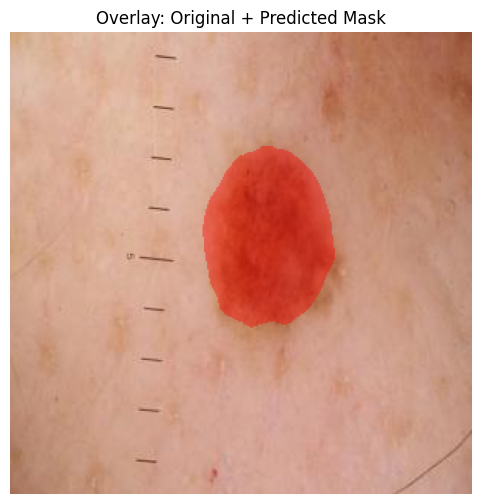

In [17]:
import numpy as np

# Convert original image and mask to NumPy
orig_img_np = np.array(img.resize((300, 300)))  # Make sure dimensions match
mask_np = pred_mask.squeeze().numpy()

# Normalize mask to 0-255 for alpha channel
mask_overlay = (mask_np * 255).astype(np.uint8)

# Create a red overlay mask
red_overlay = np.zeros_like(orig_img_np)
red_overlay[..., 0] = 255  # Red channel only

# Blend: show red where the mask is 1, original where mask is 0
alpha = 0.4  # Transparency
blended = np.where(mask_np[..., None] == 1,
                   (orig_img_np * (1 - alpha) + red_overlay * alpha).astype(np.uint8),
                   orig_img_np)

# Show overlay
plt.figure(figsize=(6, 6))
plt.title("Overlay: Original + Predicted Mask")
plt.imshow(blended)
plt.axis("off")
plt.show()
